# library's

In [1]:
import pandas as pd
import numpy as np

# visualization library

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## webscraping data calling

In [3]:
df =pd.read_csv('flipkart.csv')

In [4]:
df.head()

,Unnamed: 0,ProductName,stars,Rating,Reviews,CPU,Ram,storage,size,actual_price,flipkart_offer
0,0,ASUS,4.2,258,24,Celeron,4,128,29.46,30990,20990
1,1,ASUS,3.6,11,1,i3,8,512,39.62,51990,38236
2,2,ASUS,4.2,"2,860",278,i3,8,512,39.62,56990,34990
3,3,Lenovo,4.1,"1,392",151,Celeron,8,256,39.62,46090,26989
4,4,Lenovo,4.3,"5,381",510,i3,8,512,39.62,55490,36950


#  Removing unwanted columns

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,ProductName,stars,Rating,Reviews,CPU,Ram,storage,size,actual_price,flipkart_offer
0,ASUS,4.2,258,24,Celeron,4,128,29.46,30990,20990
1,ASUS,3.6,11,1,i3,8,512,39.62,51990,38236
2,ASUS,4.2,"2,860",278,i3,8,512,39.62,56990,34990
3,Lenovo,4.1,"1,392",151,Celeron,8,256,39.62,46090,26989
4,Lenovo,4.3,"5,381",510,i3,8,512,39.62,55490,36950


# basic steps

In [7]:
## checking null values
df.isnull().sum()

ProductName       0
stars             0
Rating            0
Reviews           0
CPU               0
Ram               0
storage           0
size              0
actual_price      0
flipkart_offer    0
dtype: int64

In [8]:
## checking null values
df.duplicated().sum()

174

In [9]:
df.corr()

,stars,Ram,storage,size,actual_price,flipkart_offer
stars,1.000000,0.320517,0.175611,-0.002594,0.227558,0.273128
Ram,0.320517,1.000000,0.516588,0.168705,0.627371,0.495602
storage,0.175611,0.516588,1.000000,0.352861,0.637040,0.568896
size,-0.002594,0.168705,0.352861,1.000000,0.318472,0.203264
actual_price,0.227558,0.627371,0.637040,0.318472,1.000000,0.824947
flipkart_offer,0.273128,0.495602,0.568896,0.203264,0.824947,1.000000


In [10]:
df.describe()

,stars,Ram,storage,size,actual_price,flipkart_offer
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,4.139238,7.932735,407.251121,40.960538,55769.044843,39407.636771
std,0.319562,3.119342,136.304961,17.977965,13563.950806,8658.166295
min,3.000000,2.000000,64.000000,12.440000,24990.000000,15990.000000
25%,4.000000,8.000000,256.000000,35.560000,47784.500000,35990.000000
50%,4.200000,8.000000,512.000000,39.620000,56213.000000,39945.000000
75%,4.300000,8.000000,512.000000,39.620000,64290.000000,46216.000000
max,5.000000,16.000000,512.000000,100.630000,90783.000000,79700.000000


## data visualization

In [11]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<AxesSubplot: xlabel='flipkart_offer', ylabel='Density'>

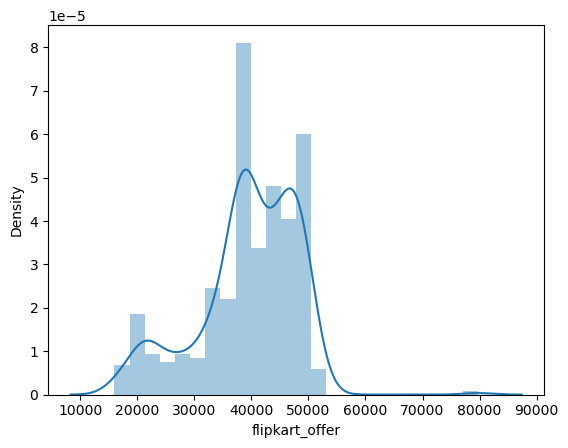

In [12]:

sns.distplot(df['flipkart_offer'])

<AxesSubplot: >

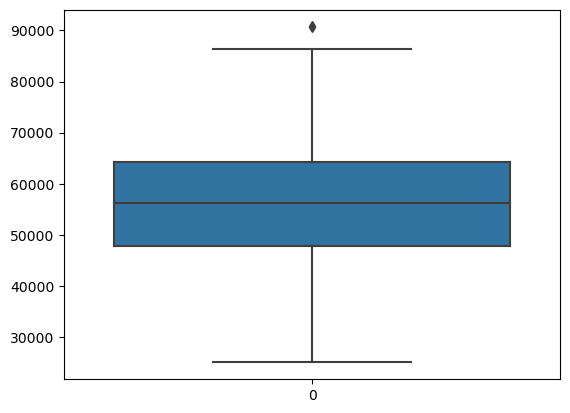

In [13]:
sns.boxplot(df['actual_price'])

<AxesSubplot: xlabel='actual_price', ylabel='Density'>

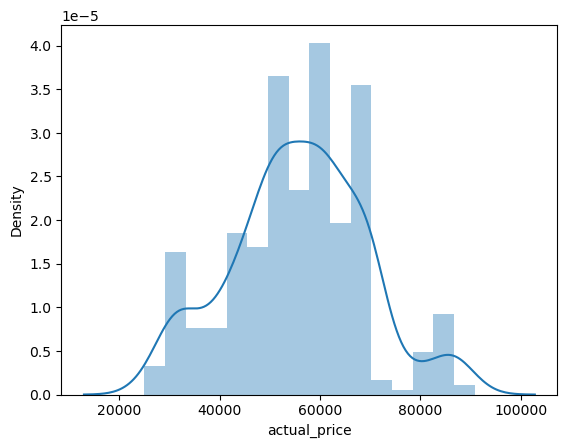

In [14]:
sns.distplot(df['actual_price'])

## convert left skew into normal skew

In [15]:
## skewnwes find left 

In [16]:
df['flipkart_offer'].skew()

-0.6248843431603556

In [18]:
import math

In [20]:
a=np.square(df['flipkart_offer'].skew())
a

0.390480442326949

In [16]:
df['actual_price'].skew()

0.04198175339912332

<AxesSubplot: >

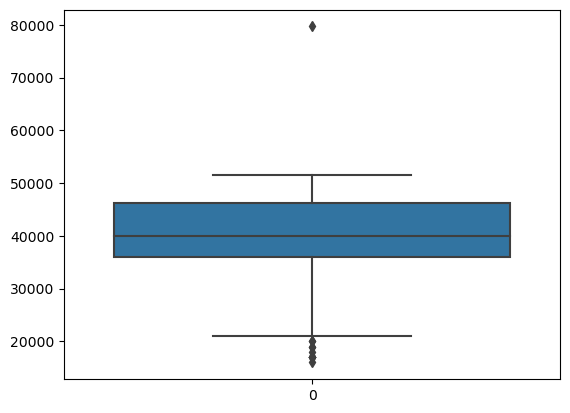

In [17]:
sns.boxplot(df['flipkart_offer'])

## removes outliers

In [18]:
print('MEAN:',df['flipkart_offer'].mean())
print('std:-',df['flipkart_offer'].std())
print('Max:-',df['flipkart_offer'].max())
print('Min:-',df['flipkart_offer'].min())

MEAN: 39407.63677130045
std:- 8658.166294581224
Max:- 79700
Min:- 15990


In [19]:
upper_limit = df['flipkart_offer'].mean()+3*df['flipkart_offer'].std()
lower_limit = df['flipkart_offer'].mean()-3*df['flipkart_offer'].std()

In [20]:
upper_limit=int(np.round(upper_limit,0))
upper_limit

65382

In [21]:
lower_limit=int(np.round(lower_limit,0))
lower_limit

13433

## trimming

In [22]:
df[df['flipkart_offer']<13433]

,ProductName,stars,Rating,Reviews,CPU,Ram,storage,size,actual_price,flipkart_offer


In [23]:
upper_limit

65382

In [24]:
lower_limit

13433

## capping

In [25]:
df['flipkart_offer'] = np.where(df['flipkart_offer']>upper_limit,upper_limit,
                                np.where(df['flipkart_offer']<lower_limit,
                                        lower_limit,df['flipkart_offer']))

In [28]:
np.square(df['flipkart_offer'].skew())

0.6644319629779618

<AxesSubplot: ylabel='Density'>

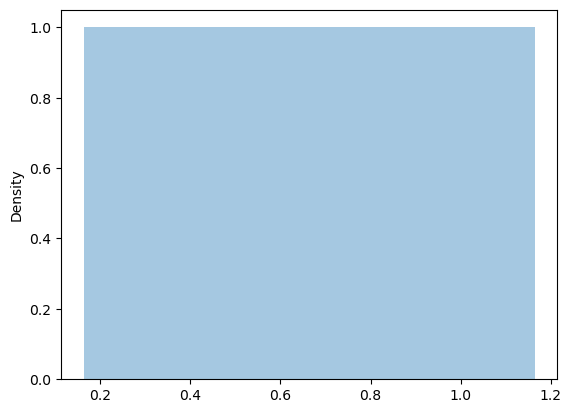

In [27]:
sns.distplot(np.square(df['flipkart_offer'].skew()))

<AxesSubplot: >

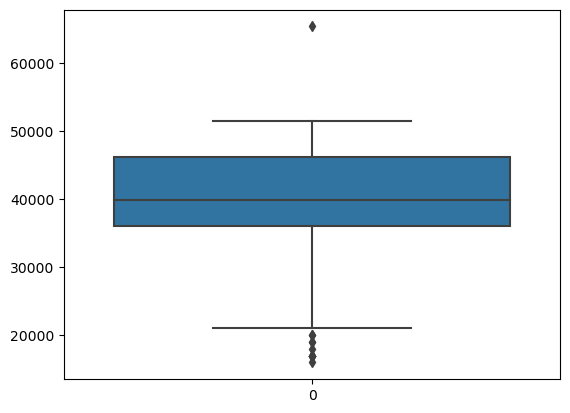

In [29]:
sns.boxplot(df['flipkart_offer'])

In [53]:
df['flipkart_offer'].values.min()

15990

<AxesSubplot: >

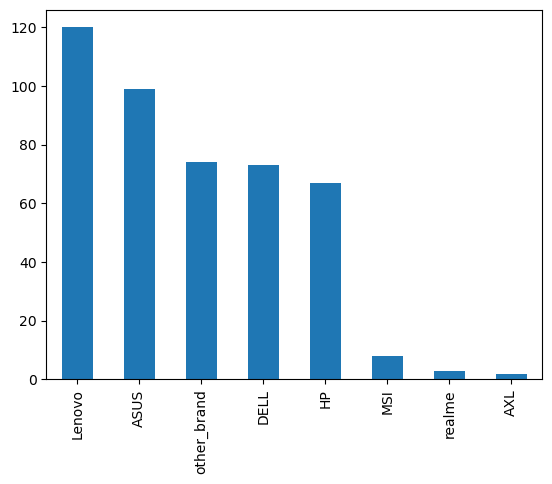

In [23]:
df['ProductName'].value_counts().plot(kind='bar')

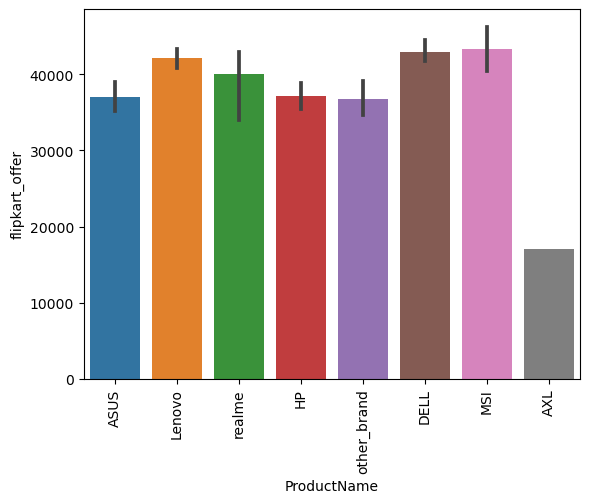

In [33]:
sns.barplot(x=df['ProductName'],y=df['flipkart_offer'])
plt.xticks(rotation='vertical')
plt.show()

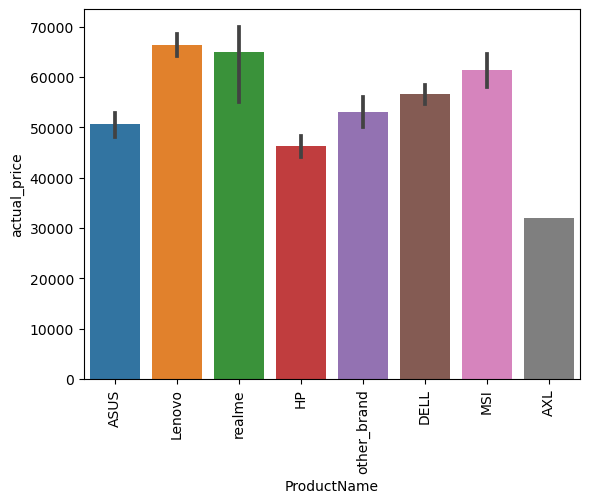

In [32]:
sns.barplot(x=df['ProductName'],y=df['actual_price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

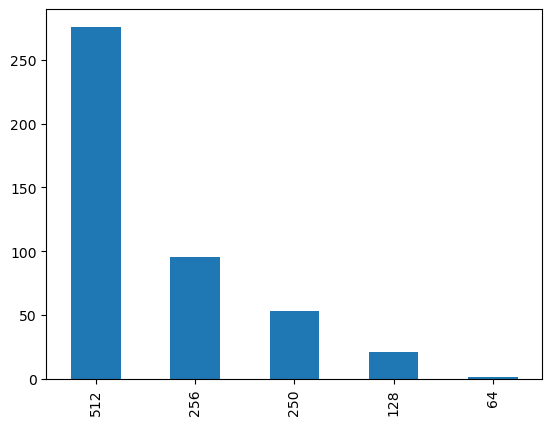

In [34]:
df['storage'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='size', ylabel='Density'>

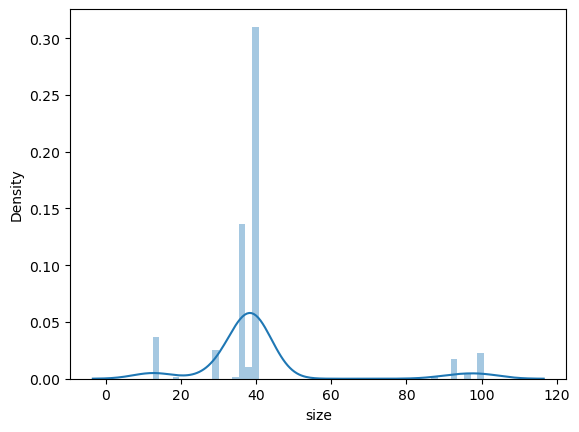

In [35]:
sns.distplot(df['size'])

<AxesSubplot: xlabel='size', ylabel='actual_price'>

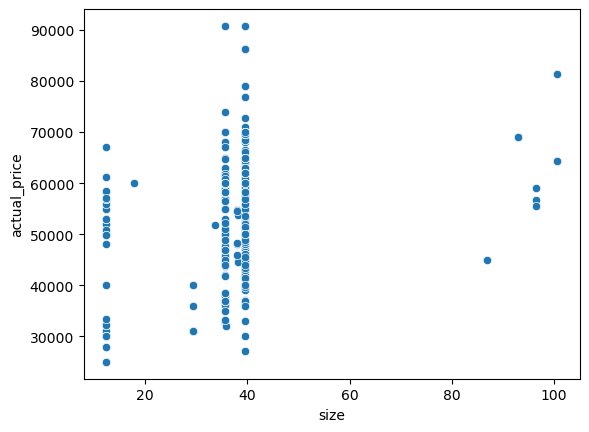

In [36]:
sns.scatterplot(x=df['size'],y=df['actual_price'])

<AxesSubplot: xlabel='size', ylabel='flipkart_offer'>

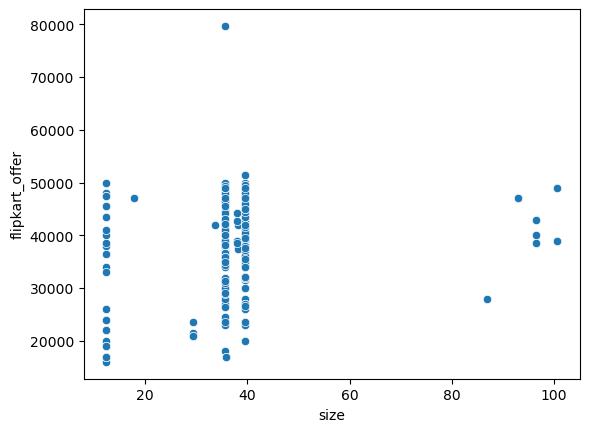

In [37]:
sns.scatterplot(x=df['size'],y=df['flipkart_offer'])

In [ ]:
for col in x:
    plt.scatter(x[col],y)
    
    plt.xlabel(col)
    plt.ylabel('flipkart_offer')
    plt.show()

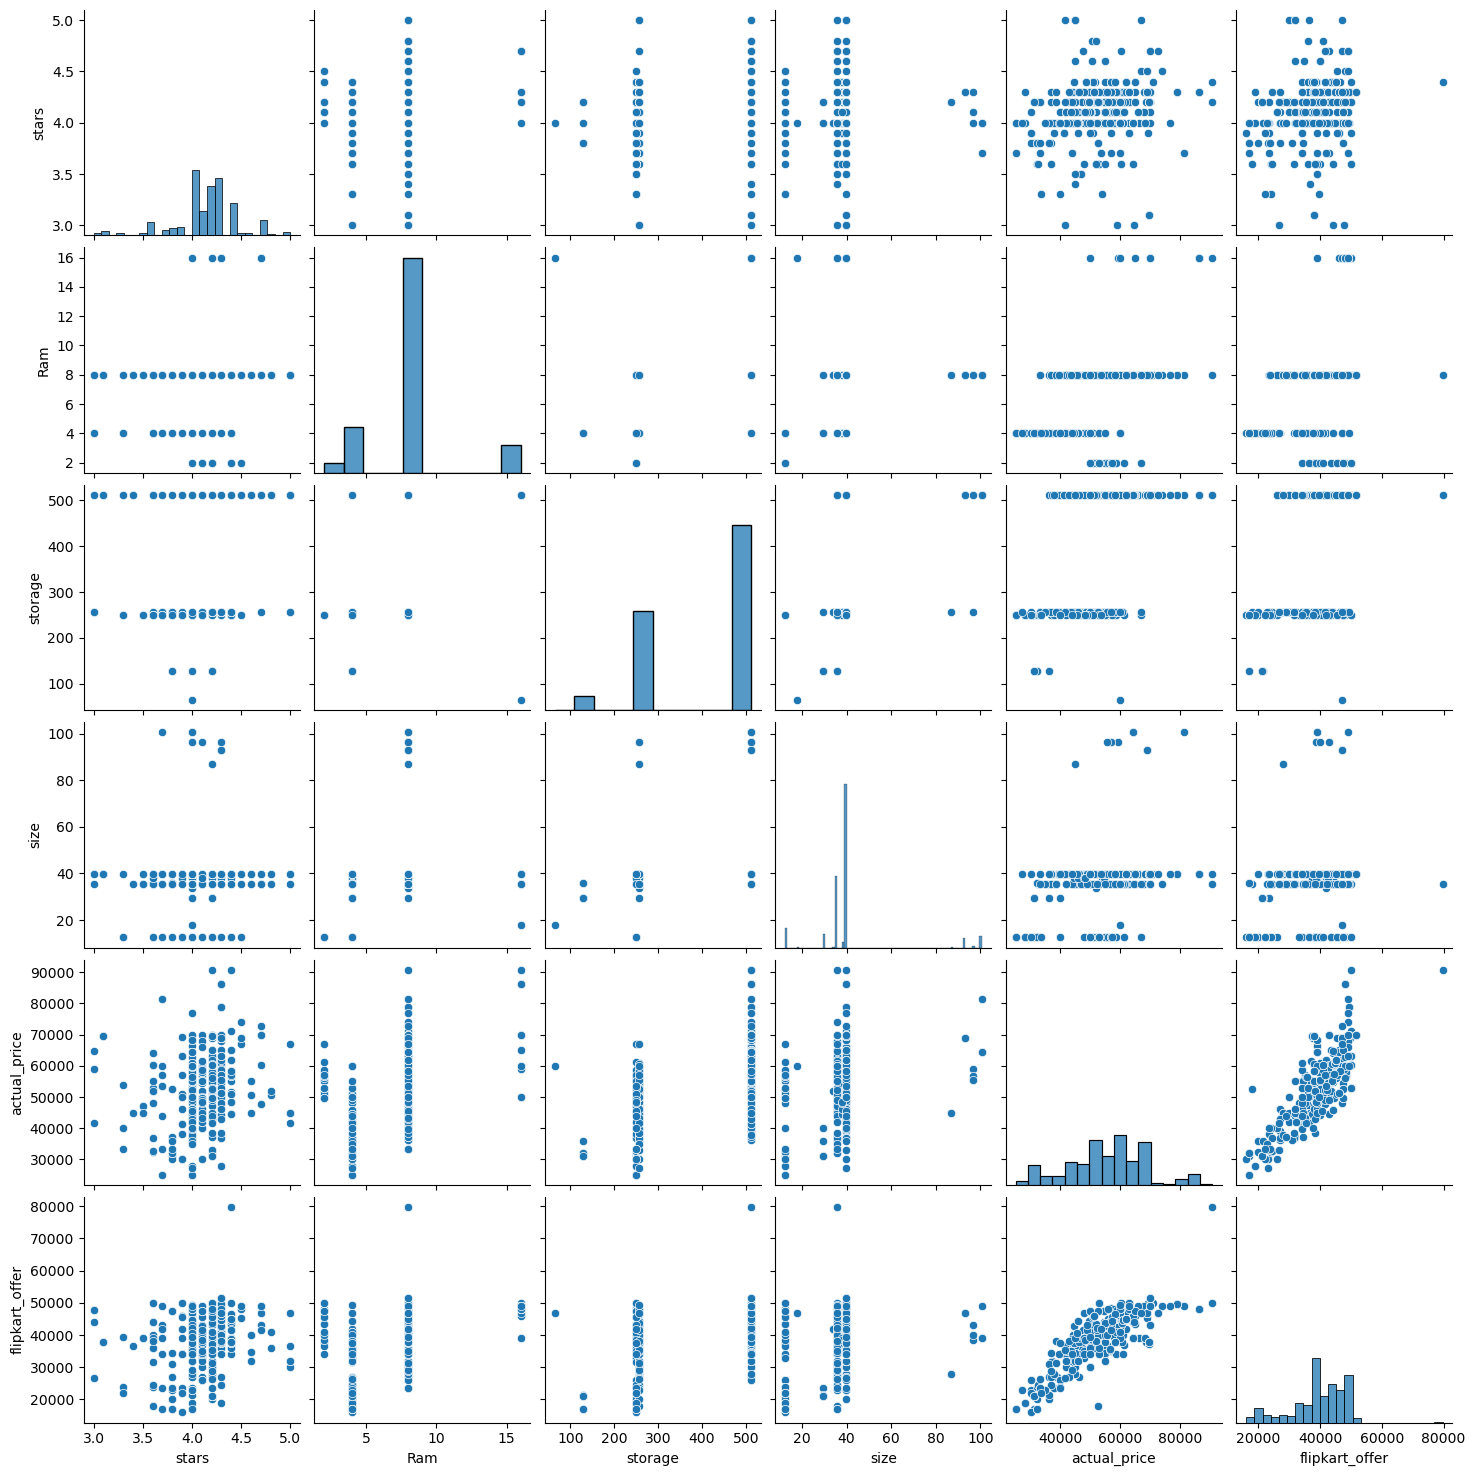

In [38]:
sns.pairplot(df)